In [1]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
record = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/session_record.csv',index_col=0)

In [3]:
record.shape

(793, 16)

## Extract sessions

In [4]:
K7 = record[((record['Mouse ID']=='K7') & (record['p(high Port)'] > 0))].copy()
K9 = record[((record['Mouse ID']=='K9') & (record['p(high Port)'] > 0))].copy()
K13 = record[((record['Mouse ID']=='K13') & (record['p(high Port)'] > 0))].copy()

q43_ = record[(((record['Mouse ID']=='q43') |(record['Mouse ID']=='Q43')) & (record['p(high Port)'] > 0))].copy()
q45_ = record[(((record['Mouse ID']=='q45') |(record['Mouse ID']=='Q45')) & (record['p(high Port)'] > 0))].copy()
K1_ = record[((record['Mouse ID']=='K1') & (record['p(high Port)'] > 0))].copy()
K1 = K1_.loc[543:].copy()
q43 = q43_.loc[623:].copy()
q45 = q45_.loc[644:].copy()

mice = [K7,K9,K13,K1,q43,q45]

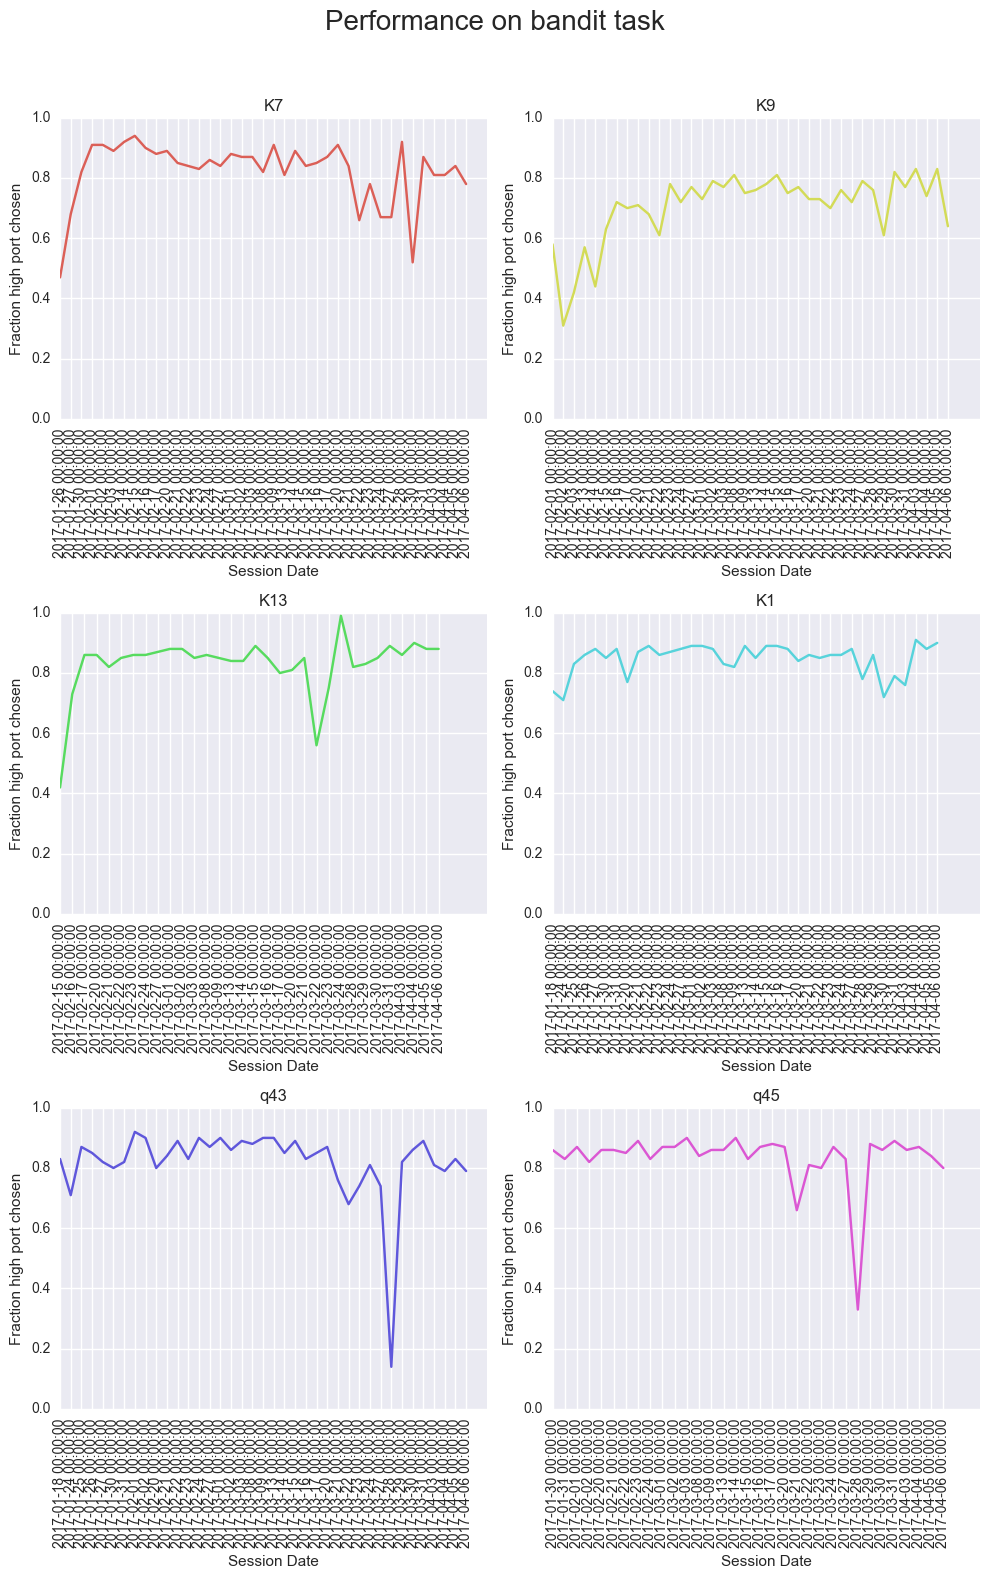

In [5]:
colorz = sns.color_palette('hls',n_colors=6)
fig = plt.figure(figsize=(10,15))
plt.suptitle('Performance on bandit task',x=0.5,y=1.05,fontsize=20)

for i,mouse in enumerate(mice):
    
    #extract the dates
    dates = []
    for date in mouse['Date'].values:
        dates.append(str(date))
    
    plt.subplot(3,2,i+1)
    plt.title(mouse['Mouse ID'].values[0])
    plt.plot(range(mouse.shape[0]),mouse['p(high Port)'].values,color=colorz[i],label=mouse['Mouse ID'].values[0])
    plt.xticks(range(mouse.shape[0]),mouse['Date'].values,rotation=90)
    plt.ylim(0,1)
    plt.xlabel('Session Date')
    plt.ylabel('Fraction high port chosen')
    plt.ylim(0,1.0)

plt.tight_layout()

In [6]:
record.tail(25)

,Session ID,Mouse ID,Date,Phase,Left Reward Prob,Right Reward Prob,Block Range Min,Block Range Max,No. Trials,No. Blocks,No. Rewards,p(high Port),Decision Window Duration,Min Inter-trial-interval,Left Solenoid Duration,Right Solenoid Duration
768,04032017_Q45,Q45,2017-04-03 00:00:00,2.0,0.2,0.8,50.0,50.0,610.0,8.0,442.0,0.86,2.0,1.0,35.0,35.0
769,04042017_K1,K1,2017-04-04 00:00:00,2.0,0.1,0.9,50.0,50.0,623.0,10.0,515.0,0.91,2.0,1.0,35.0,35.0
770,04042017_K10,K10,2017-04-04 00:00:00,1.0,1.0,1.0,1000.0,1000.0,67.0,0.0,67.0,0.00,10.0,1.0,40.0,40.0
771,04042017_K11,K11,2017-04-04 00:00:00,2.0,0.0,1.0,30.0,30.0,41.0,0.0,13.0,0.32,2.0,1.0,35.0,35.0
772,04042017_K13,K13,2017-04-04 00:00:00,2.0,0.9,0.1,50.0,50.0,492.0,8.0,400.0,0.90,2.0,1.0,35.0,35.0
773,04042017_K7,K7,2017-04-04 00:00:00,2.0,0.2,0.8,50.0,50.0,618.0,8.0,417.0,0.81,2.0,1.0,35.0,35.0
774,04042017_K9,K9,2017-04-04 00:00:00,2.0,0.2,0.8,50.0,50.0,276.0,3.0,164.0,0.74,2.0,1.0,35.0,35.0
775,04042017_Q43,Q43,2017-04-04 00:00:00,2.0,0.2,0.8,50.0,50.0,511.0,6.0,347.0,0.79,2.0,1.0,35.0,35.0
776,04042017_Q45,Q45,2017-04-04 00:00:00,2.0,0.8,0.2,50.0,50.0,563.0,8.0,410.0,0.87,2.0,1.0,35.0,35.0
777,04052017_K1,K1,2017-04-05 00:00:00,2.0,0.1,0.9,50.0,50.0,490.0,8.0,400.0,0.88,2.0,1.0,35.0,35.0
